The features Weight and Label were originally only provided in the training-dataset. The data used in this thesis is expanded by complete Weight-, Labels-features and the Kaggle-specific features KaggleSet and KaggleWeight.

All features of the dataset are described in Appendix A.

reducing features by using their relationship with PRI_jet_num

In [1]:
import kaggleData as kD
import toolbox as tb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import os

In [2]:
scriptFolderPath = os.path.dirname(os.getcwd())
mainFolderPath = os.path.dirname(scriptFolderPath)
plotPath = (mainFolderPath + "/Plots")
scatterPath = (plotPath + "/Scatter") 
histPath = (plotPath + "/Hist") 

In [3]:
csv_data,csv_header = kD.csvToArray()

In [4]:
train_data,train_header,test_data,test_header=kD.getOriginalKaggleSets(csv_data,csv_header)

In [5]:
test_data = kD._extractKaggleDataset(csv_data,csv_header,["b","v"])

In [6]:
test_labels = kD._extractFeature("Label",test_data ,csv_header,dtype="<U16")
test_labels = kD.translateLabels(test_labels,["Label"]).astype(float)

In [13]:
#cut, if given, EventId and Weight, preserve Label as new array, pls
train_all = train_data[:,1:-2].astype(float)
train_labels = kD.translateLabels(train_data[:,-1],["Label"]).astype(float)
test_all = test_data[:,1:-3].astype(float)
header_all = test_header[1:]

#4.617290019989014 sec

In [14]:
def countErrorsByJets(header,data):
    index_PRI_jet_num = np.int(header.index("PRI_jet_num"))
    ######### 0 1 2 3 #########
    totals = np.zeros((4),dtype=np.int)
    errors = np.zeros((4,len(header)),dtype=np.int)
    for i in range(0,len(data[:,index_PRI_jet_num])):
        jets = np.int(data[i,index_PRI_jet_num])
        totals[jets] += 1
        for feat in header:
            index_feat = np.int(header.index(feat))
            if np.float(data[i,index_feat]) == -999:
                errors[jets,index_feat] +=1
    return totals,errors

In [15]:
def plot_PJN_Errors(header,data):
    totals,errors = countErrorsByJets(header,data)

    font = {'weight' : 'bold',
            'size'   : 10}


    #fig = plt.figure(figsize=(15,10))
    
    b = 0
    colors = ['green','red','blue','grey']
    plot = [0,0,0,0]
    for i in [0,1,2,3]:
        plot[i] = plt.bar(left = np.arange(30), height = errors[i,:],
               bottom = b, color=colors[i], alpha=0.5)
        b += errors[i,:]
        
    #yticks = np.linspace(0,totals.cumsum()[-1])
    plt.yticks(np.unique(b))
    #plt.xticks(np.arange(31))
    
    plt.ylabel('Error-Values')
    plt.xlabel('Features')
    plt.title('Error-Values in features related to PRI_jet_num (Pjn)')

    plt.xticks(np.arange(31), header, rotation=90)
    matplotlib.rc('font', **font)
    plt.legend((plot[0][0],plot[1][0],plot[2][0],plot[3][0]), ('Pjn = 0', 'Pjn = 1','Pjn = 2','Pjn = 3',))
    return plt

In [16]:
countErrorsByJets(header_all,test_all)

(array([220156, 169716, 111006,  49122]),
 array([[ 57444,      0,      0,      0, 220156, 220156, 220156,      0,
              0,      0,      0,      0, 220156,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0, 220156,
         220156, 220156, 220156, 220156, 220156,      0],
        [ 16713,      0,      0,      0, 169716, 169716, 169716,      0,
              0,      0,      0,      0, 169716,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0, 169716, 169716, 169716,      0],
        [  6537,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0],
        [  3128,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      

Populating the interactive namespace from numpy and matplotlib


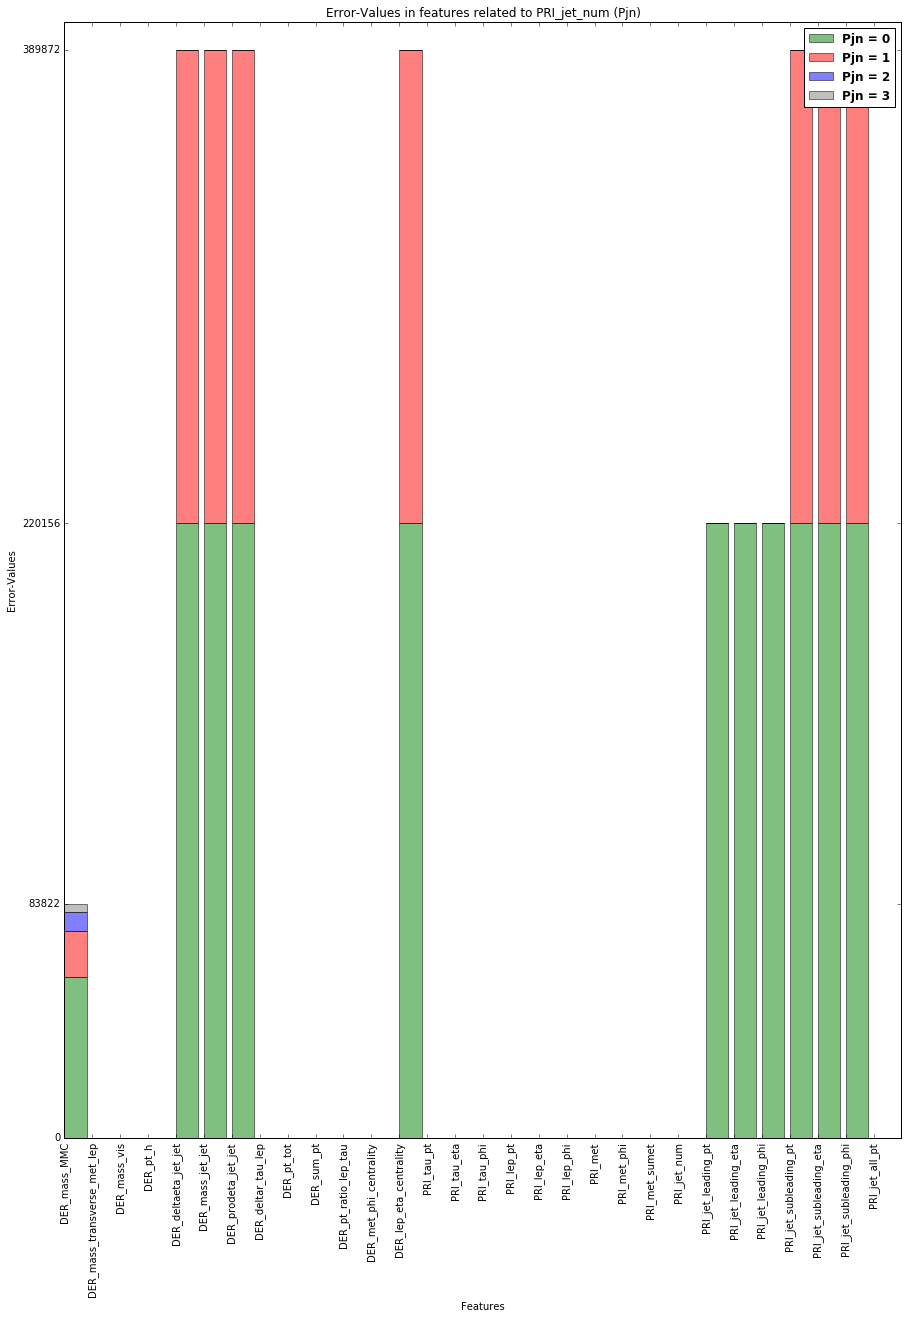

In [17]:
%pylab inline
mainFig = plt.figure(figsize = (15,20))
mainFig.add_subplot(111)
ax = plot_PJN_Errors(header_all,test_all);
#mainFig.savefig(plotPath + "/PJN_Errors")
#plt.close("all")

We extract all featurenames which contain errors

In [18]:
totals,errors = countErrorsByJets(test_header,test_data)
errorFeatures = []
for i in range(0,31):
    if errors[0,i] != 0:
        errorFeatures.append(test_header[i])        

We still want DER_mass_MMC, it is a valuable feature, as other tests had shown

In [19]:
errorFeatures.remove('DER_mass_MMC')

In [20]:
errorFeatures

['DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_lep_eta_centrality',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi']

In [21]:
def scaleAxis(data,cutPercent):
    sData = sorted(data)
    l = len(sData)
    cutPoint = int(cutPercent*l/100)
    axisMax = sData[l - cutPoint]
    axisMin = sData[cutPoint]
    if axisMin == -999.0:
        for x in sData:
            if x > axisMin:
                axisMin = x
                break
    return axisMin,axisMax

In [22]:
def generateLabelsColors(labels):
    colors = []
    for i in range(0,len(labels)):
        label = labels[i]
        if label == 1:
            labelColor = "b" ##signal = blue
        elif label == 0:
            labelColor = "r" ##background = red
        else:
            print("ERROR in Labels!")
        colors.append(labelColor)
    return colors

In [23]:
def scattered(xName,yName,xData,yData,labels, alph=0.2):
    font = {'size'   : 20}
    colors = generateLabelsColors(labels)

    scale = 0.5
    xmin,xmax = scaleAxis(xData,scale)
    ymin,ymax = scaleAxis(yData,scale)
    
    scat = plt.scatter(xData, yData, s=1, edgecolor="", c=colors, alpha=alph)   
    
    plt.xlabel(xName)
    plt.ylabel(yName)
    
    plt.axis([xmin,xmax,ymin,ymax])
    
    title = ("Scatterplot: "+ xName+ " to "+ yName)
    
    blue_patch = mpatches.Patch(color='blue', label='signal')
    red_patch = mpatches.Patch(color='red', label='background')
    plt.legend(handles=[blue_patch,red_patch])
    matplotlib.rc('font', **font)
    plt.title(title)
    
    return plt

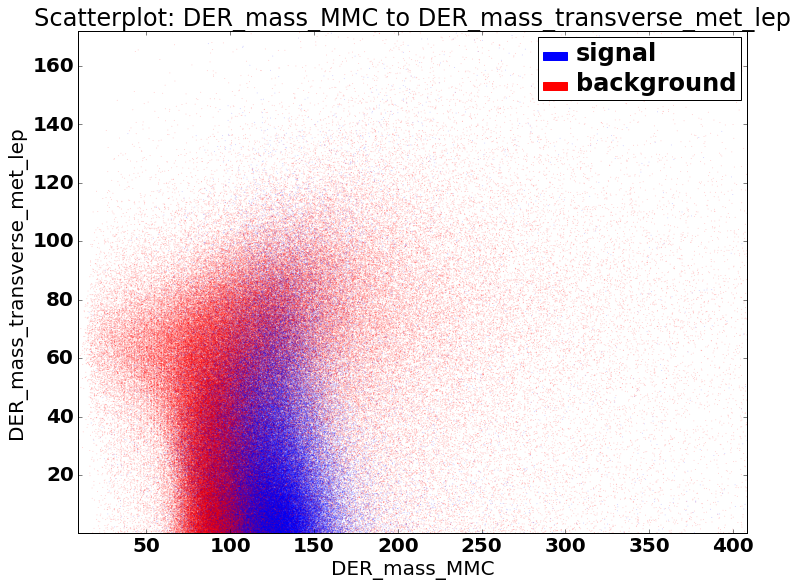

In [24]:
xName = "DER_mass_MMC"
yName = "DER_mass_transverse_met_lep"

xData = test_all[:,header_all.index(xName)]
yData = test_all[:,header_all.index(yName)]
labels = test_labels

mainFig = plt.figure(figsize=(12,9))
ax = mainFig.add_subplot(111)
ax = scattered(xName,yName,xData,yData,test_labels, alph=0.2)
savePath = ("/BA_git/Docs/latex/Thesis/src/v4/images/" + "scat_" + xName + "to" + yName)
#mainFig.savefig(savePath)

In [25]:
def createAllScatterplots(header,data,labels,scatterPath,startX=1,x_size=3,y_size=2,n=0):
    for x in range(startX,len(header)):
        xName = header[x]
        xData = data[:,x]
        xFolder = (scatterPath + "/" + xName)
        if not os.path.exists(xFolder):
            os.makedirs(xFolder)
        y = 1
        while y in range(1,len(header)):
            mainFig = plt.figure(figsize=(20,15))
            for i in range(1,(1+(x_size*y_size))):
                yName = header[y]
                yData = data[:,y]    
                ax = mainFig.add_subplot(x_size,y_size,i)
                y += 1
                ax = scattered(xName,yName,xData,yData,labels)

            savePath = (xFolder + "/" + str(n))
            n += 1
            mainFig.savefig(savePath)
            mainFig = None
            
        plt.close("all")

In [26]:
start = header_all.index("PRI_lep_pt")
n = (start-1)*5
#createAllScatterplots(header_all,test_all,test_labels,scatterPath,startX=start,n=n)

In [27]:
def histo(featName,data,labels):
    font = {'size'   : 20}

    b = 100

    title = str("Histogram: "+ featName)
    sdata = []
    bdata = []
    for i in range(0,len(data)):
        if labels[i] == 0:
            bdata.append(data[i])
        else:
            sdata.append(data[i])

    colors = generateLabelsColors(labels)
    
    scale = 0.1
    xmin,xmax = scaleAxis(data,scale)
    
    xmin = int(xmin)
    xmax = int(xmax)

    shist = plt.hist(sdata,bins = np.linspace(xmin,xmax,b), normed=1, facecolor='blue', alpha=0.3)
    bhist = plt.hist(bdata,bins = np.linspace(xmin,xmax,b), normed=1, facecolor='red', alpha=0.3)

    plt.legend(('Signal', 'Background'))

    plt.ylabel('Percentage in data')
    plt.xlabel('Values')
    plt.title(title)
    matplotlib.rc('font', **font)
    return plt

In [28]:
def createAllHistograms(header,data,labels,histPath,x=3,y=2):
    n = 0
    p = 1
    while p in range(1,len(header)):
        mainFig = plt.figure(figsize=(20,15))
        for i in range(1,(1+(x*y))):
            featName = header[p]
            feat_data = data[:,p]    
            ax = mainFig.add_subplot(x,y,i)
            ax = histo(featName,feat_data,labels);
            p += 1
        savePath = (histPath + "/hist_" + str(n))
        n += 1
        mainFig.savefig(savePath)
        
        mainFig = None
        plt.close("all")

Populating the interactive namespace from numpy and matplotlib


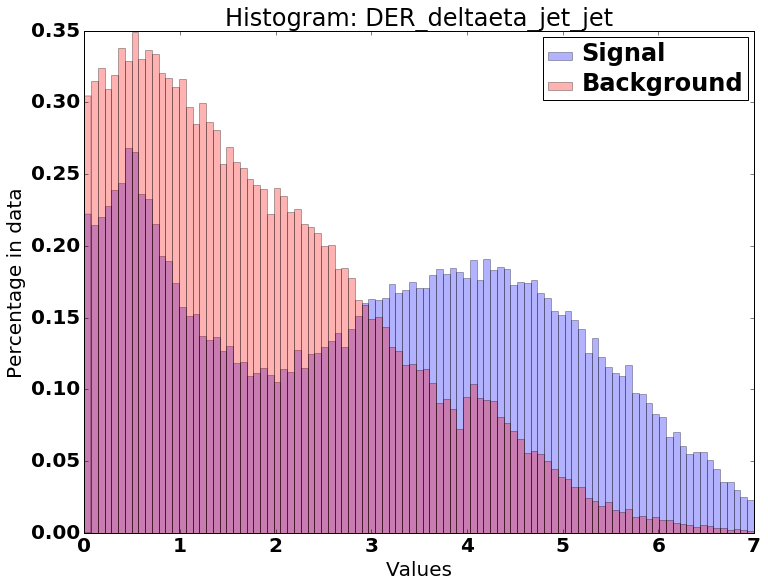

In [29]:
%pylab inline
xName = "DER_deltaeta_jet_jet"

xData = test_all[:,header_all.index(xName)]
labels = test_labels

mainFig = plt.figure(figsize=(12,9))
ax = mainFig.add_subplot(111)
ax = histo(xName,xData,test_labels)
savePath = ("/BA_git/Docs/latex/Thesis/src/v4/images/hist_" + xName)
#mainFig.savefig(savePath)

In [30]:
#createAllHistograms(header,test_data,test_labels,histPath)

In [31]:
pubLB,privLB = kD.getLeaderBoards()

In [32]:
sortedPriv=tb.sortByColumn(privLB,0)
sortedPub=tb.sortByColumn(pubLB,0)

Differences in Leaderboards:

ranks: PubLB vs PrivLB

In [33]:
rankdiff = np.copy(sortedPub[:,2]-sortedPriv[:,2])
abs_rankdiff = abs(np.copy(sortedPub[:,2]-sortedPriv[:,2]))
scorediff = np.copy(sortedPub[:,1]-sortedPriv[:,1])
abs_scorediff = abs(np.copy(sortedPub[:,1]-sortedPriv[:,1]))

Populating the interactive namespace from numpy and matplotlib


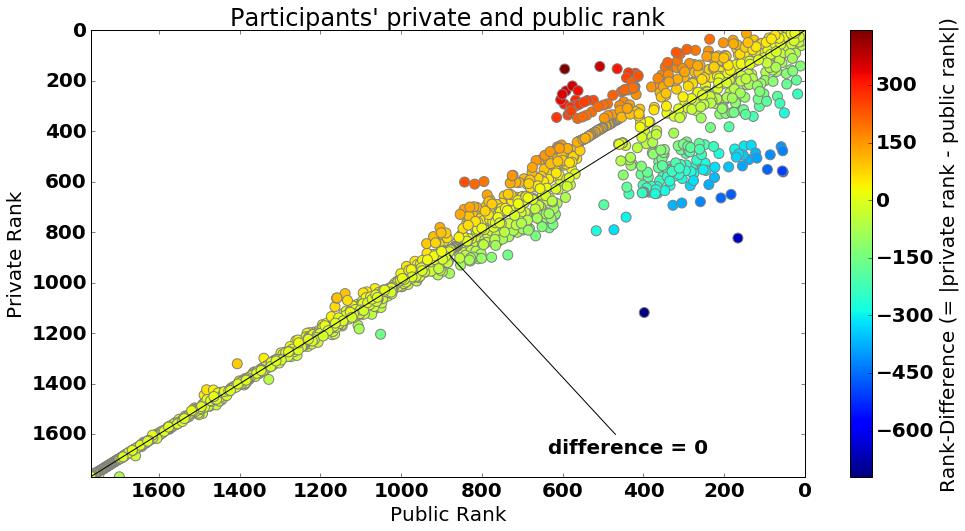

In [34]:
%pylab inline

font = {'size'   : 20}

mainFig = plt.figure(figsize=(16,8))
ax = mainFig.add_subplot(111)

xData = sortedPub[:,2]
yData = sortedPriv[:,2]

#colors = generateLabelsColors(labels)

#scale = 0.5
#xmin,xmax = scaleAxis(xData,scale)
#ymin,ymax = scaleAxis(yData,scale)
plt.Normalize()
scat = plt.scatter(xData, yData, s=100, edgecolor="gray",  c=rankdiff, cmap="jet")   
  
xName = "Public Rank"
yName = "Private Rank"
    
plt.xlabel(xName)
plt.ylabel(yName)

xmax = 1769
xmin = 0
    
plt.axis([xmax,xmin,xmax,xmin])

x = np.arange(xmin,xmax)
xy = plt.plot(x,x,color="black")

title = ("Participants' private and public rank")

coord = int(abs(xmax-xmin)/2)
    
#blue_patch = mpatches.Patch(color='blue', label='signal')
#red_patch = mpatches.Patch(color='red', label='background')
#plt.legend(handles=[blue_patch,red_patch])
matplotlib.rc('font', **font)
plt.title(title)

cbar = plt.colorbar()
cbar.set_label("Rank-Difference (= |private rank - public rank|)")

plt.annotate("difference = 0",xy = (coord,coord), xytext=(+100,-200),
             xycoords = "data", textcoords='offset points',
             arrowprops = dict(arrowstyle="-"))

savePath = ("F:\BA_git\Docs\latex\Thesis\src\\v4\images" + "\\" + "privateVSpublic")
#mainFig.savefig(savePath)

In [35]:
percentual_diff_score = abs_scorediff.copy()
percentual_diff_score[:]= abs_scorediff[:]/sortedPub[:,1]

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [52]:
rankdiff.min()

-720.0

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


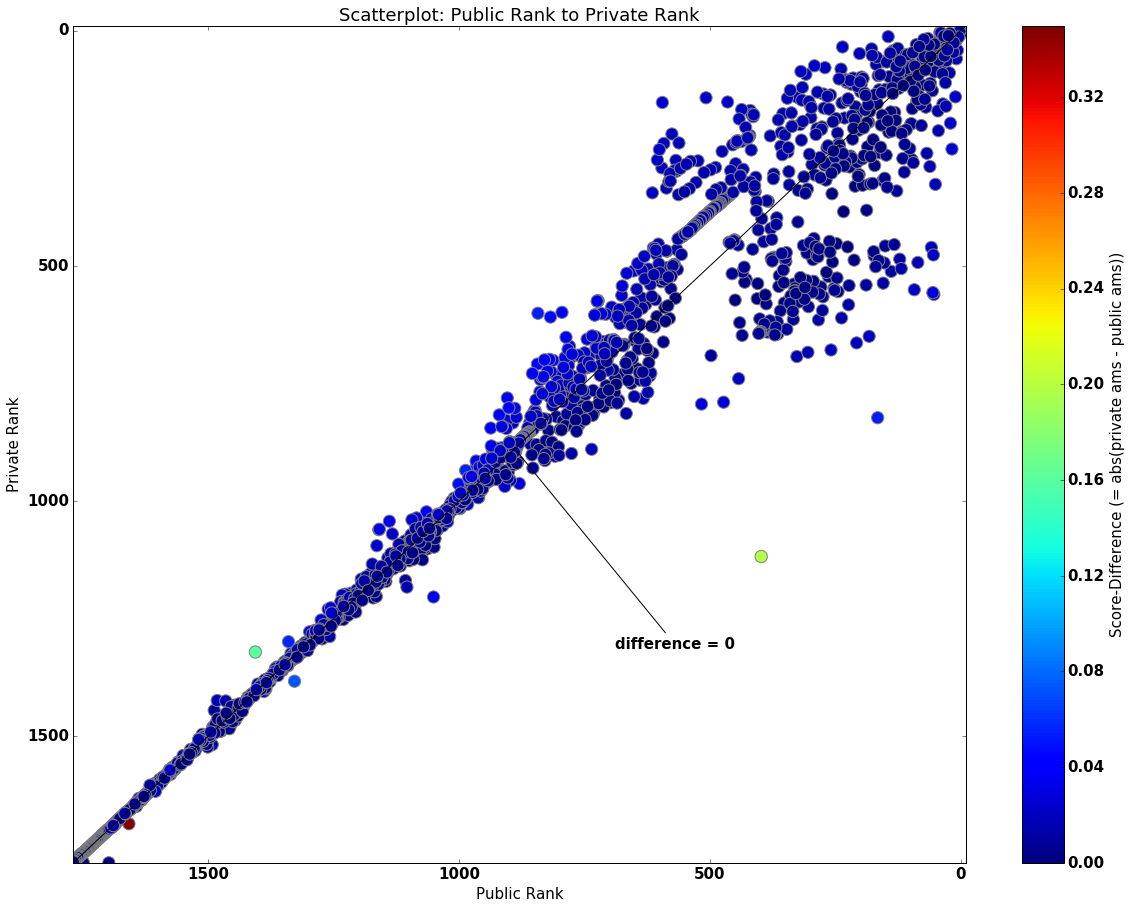

In [37]:
%pylab inline

font = {'size'   : 15}

mainFig = plt.figure(figsize=(20,15))
ax = mainFig.add_subplot(111)

xData = sortedPub[:,2]
yData = sortedPriv[:,2]

#colors = generateLabelsColors(labels)

#scale = 0.5
#xmin,xmax = scaleAxis(xData,scale)
#ymin,ymax = scaleAxis(yData,scale)
    
scat = plt.scatter(xData, yData, s=150, edgecolor="gray",  c=percentual_diff_score, cmap="jet")   
  
xName = "Public Rank"
yName = "Private Rank"
    
plt.xlabel(xName)
plt.ylabel(yName)

xmin = 1769
#xmin = 1000
#xmin = 500
xmax = -10
    
plt.axis([xmin,xmax,xmin,xmax])
#plt.axis([1000,1,1000,1])
#plt.axis([500,1,500,1])

x = np.arange(xmax,xmin)
xy = plt.plot(x,x,color="black")


title = ("Scatterplot: "+ xName+ " to "+ yName)

coord = int(abs(xmax-xmin)/2)
    
#blue_patch = mpatches.Patch(color='blue', label='signal')
#red_patch = mpatches.Patch(color='red', label='background')
#plt.legend(handles=[blue_patch,red_patch])
matplotlib.rc('font', **font)
plt.title(title)

cbar = plt.colorbar()
cbar.set_label("Score-Difference (= abs(private ams - public ams))")

plt.annotate("difference = 0",xy = (coord,coord), xytext=(+100,-200),
             xycoords = "data", textcoords='offset points',
             arrowprops = dict(arrowstyle="-"))

plt.show()

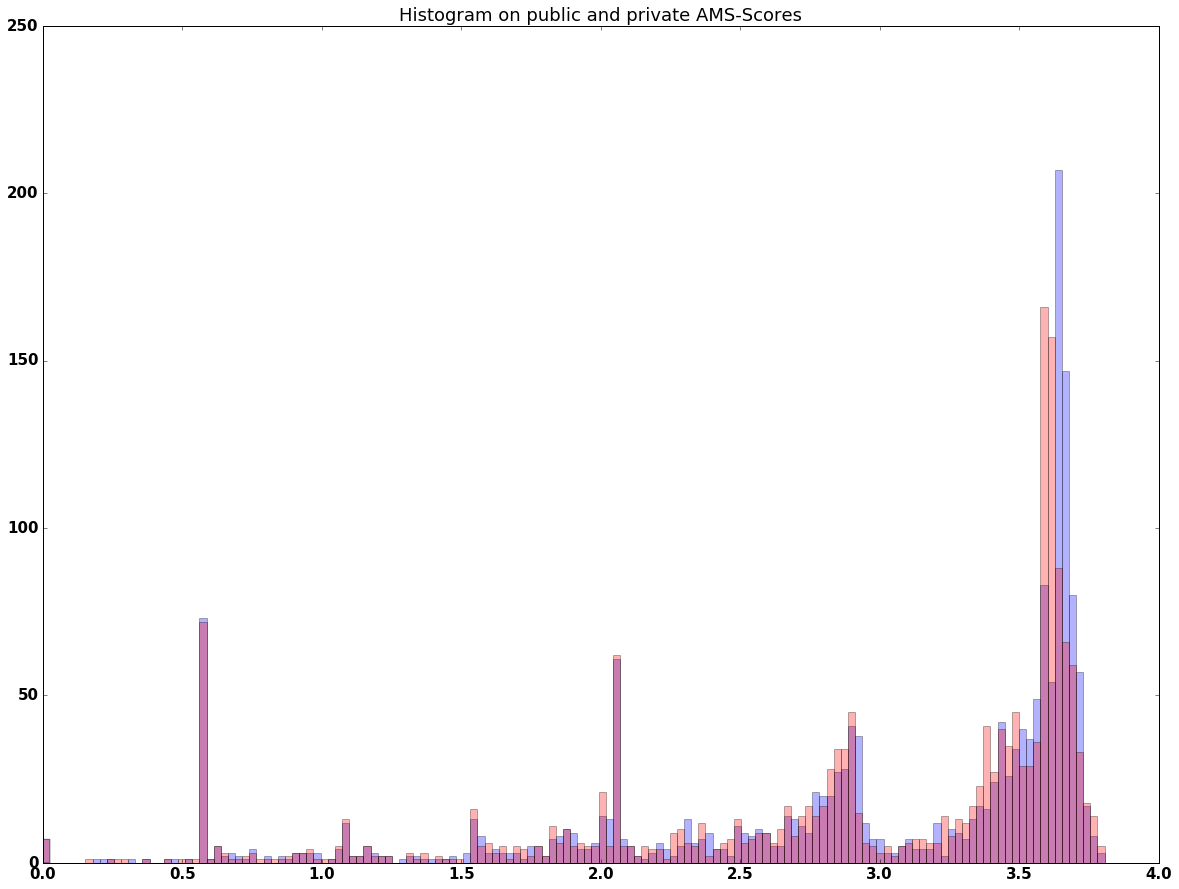

In [38]:
mainFig = plt.figure(figsize=(20,15))
ax = mainFig.add_subplot(111)

b = 100

title = "Histogram on public and private AMS-Scores"
xmin = privLB[:,1].min()
#xmin = -50
xmax = privLB[:,1].max()
#xmax = 50

hist = plt.hist(privLB[:,1],bins = np.linspace(xmin,xmax,150), color="b", alpha =0.3)
hist = plt.hist(pubLB[:,1],bins = np.linspace(xmin,xmax,150), color="r", alpha =0.3)


plt.title(title)
matplotlib.rc('font', **font)

In [39]:
sortedPriv=tb.sortByColumn(privLB,0)
sortedPub=tb.sortByColumn(pubLB,0)
sortedDiffs = np.empty([len(sortedPub[:,2]),6])

sortedDiffs[:,0] = np.copy(sortedPriv[:,0]) #user
sortedDiffs[:,1] = np.copy(sortedPriv[:,2]) #priv rank
sortedDiffs[:,2] = np.copy(sortedPub[:,2]-sortedPriv[:,2]) #rankdiff
sortedDiffs[:,3] = np.copy(abs(sortedPub[:,2]-sortedPriv[:,2])) #rankdiff
sortedDiffs[:,4] = np.copy(sortedPub[:,1]-sortedPriv[:,1]) #scorediff
sortedDiffs[:,5] = np.copy(abs(sortedPub[:,1]-sortedPriv[:,1])) #scorediff

In [40]:
sortedDiffs = tb.sortByColumn(sortedDiffs ,5)

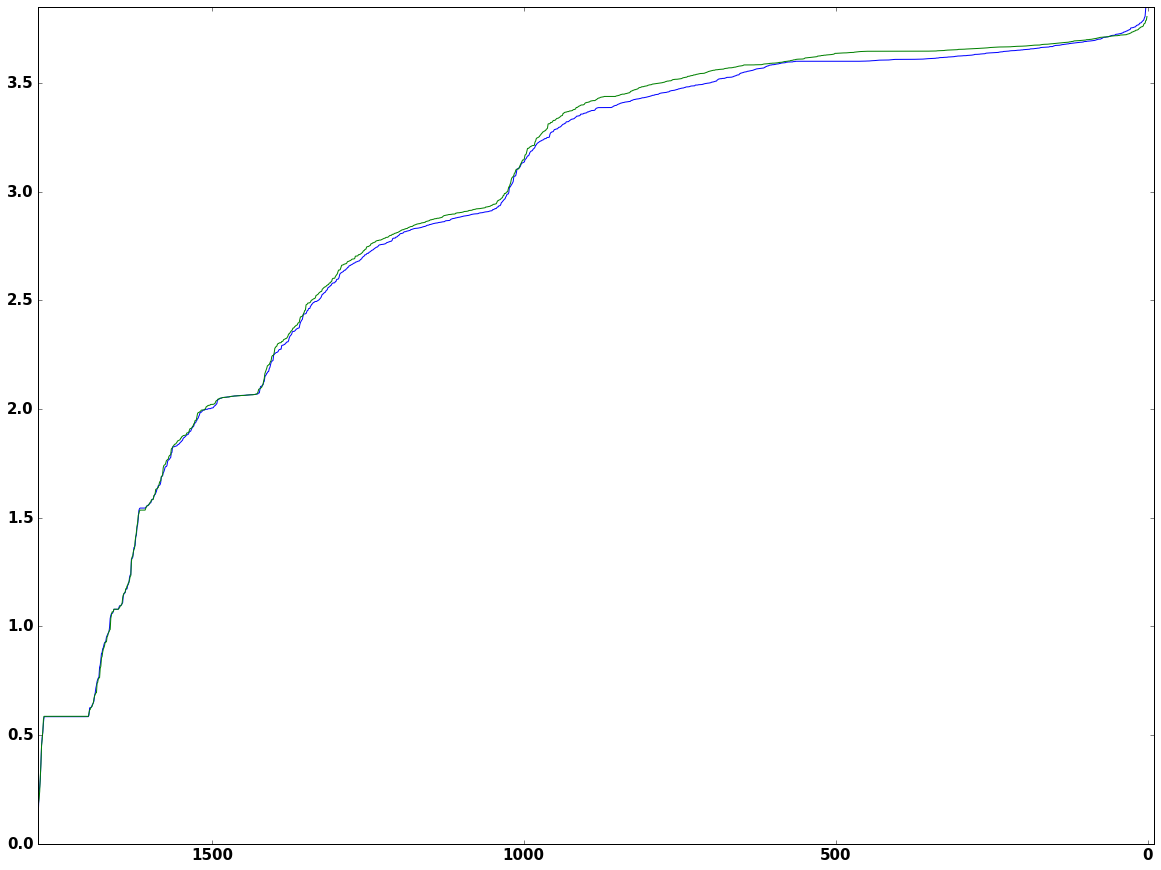

In [41]:
mainFig = plt.figure(figsize=(20,15))
ax = mainFig.add_subplot(111)

xmax = pubLB[:,1].max()
plt.axis([1779,-10,0.,xmax])

plt.plot(pubLB[:,2],pubLB[:,1])
plt.plot(privLB[:,2],privLB[:,1])

In [42]:
n_rankdiff = rankdiff.copy()

In [43]:
for i in range(0,len(n_rankdiff)):
    maxDiff = rankdiff.max()
    minDiff = rankdiff.min()
    if rankdiff[i]>0:
        n_rankdiff[i] = rankdiff[i]/maxDiff
    elif rankdiff[i]<0:
        n_rankdiff[i] = -(rankdiff[i]/minDiff)
    else:
        n_rankdiff[i]=0.

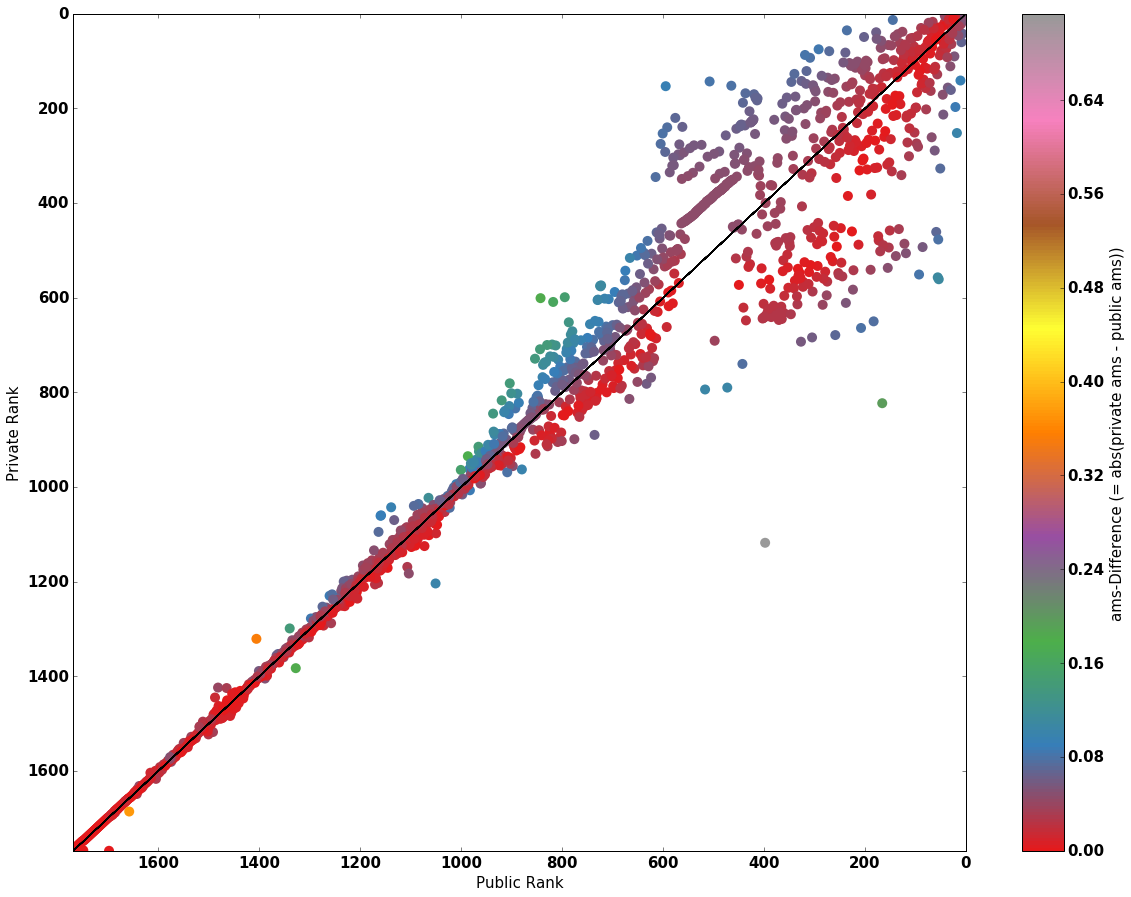

In [44]:
mainFig = plt.figure(figsize=(20,15))
ax = mainFig.add_subplot(111)

xmax = 1769
xmin = 0
plt.axis([xmax,xmin,xmax,xmin])

plt.scatter(sortedPub[:,2],sortedPriv[:,2],s=100,edgecolor="",c=abs_scorediff,cmap="Set1")

xName = "Public Rank"
yName = "Private Rank"
    
plt.xlabel(xName)
plt.ylabel(yName)

plt.plot(sortedPriv[:,2],sortedPriv[:,2],color="black")

cbar = plt.colorbar()
cbar.set_label("ams-Difference (= abs(private ams - public ams))")

In [45]:
n_scorediff = scorediff.copy()
for i in range(0,len(n_scorediff)):
    maxDiff = scorediff.max()
    minDiff = scorediff.min()
    if scorediff[i]>0:
        n_scorediff[i] = scorediff[i]/maxDiff
    elif scorediff[i]<0:
        n_scorediff[i] = -(scorediff[i]/minDiff)
    else:
        n_scorediff[i]=0.

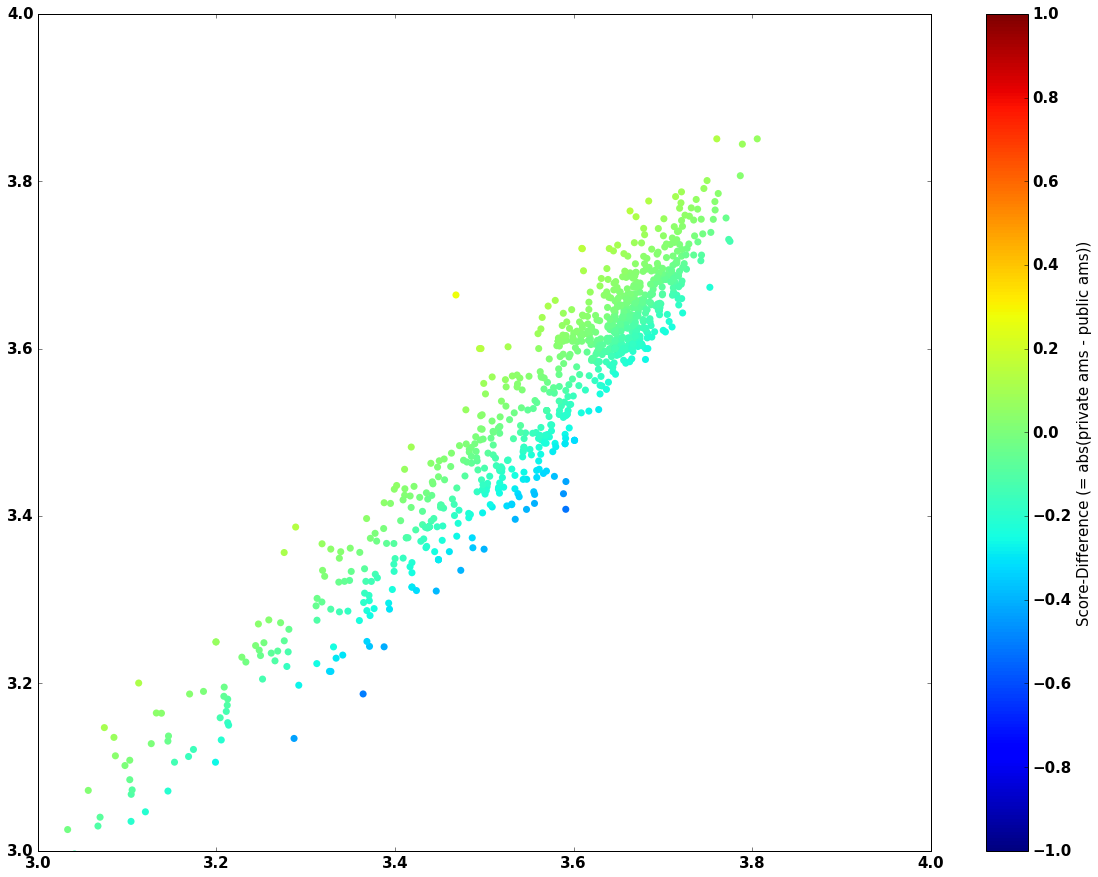

In [46]:
mainFig = plt.figure(figsize=(20,15))
ax = mainFig.add_subplot(111)

#xmax = pubLB[:,1].max()
plt.axis([3.,4.,3.,4.])

plt.scatter(sortedPriv[:,1],sortedPub[:,1],s=50,edgecolor="",c=n_scorediff,cmap="jet")

cbar = plt.colorbar()
cbar.set_label("Score-Difference (= abs(private ams - public ams))")

#plt.plot(privLB[:,2],privLB[:,1])

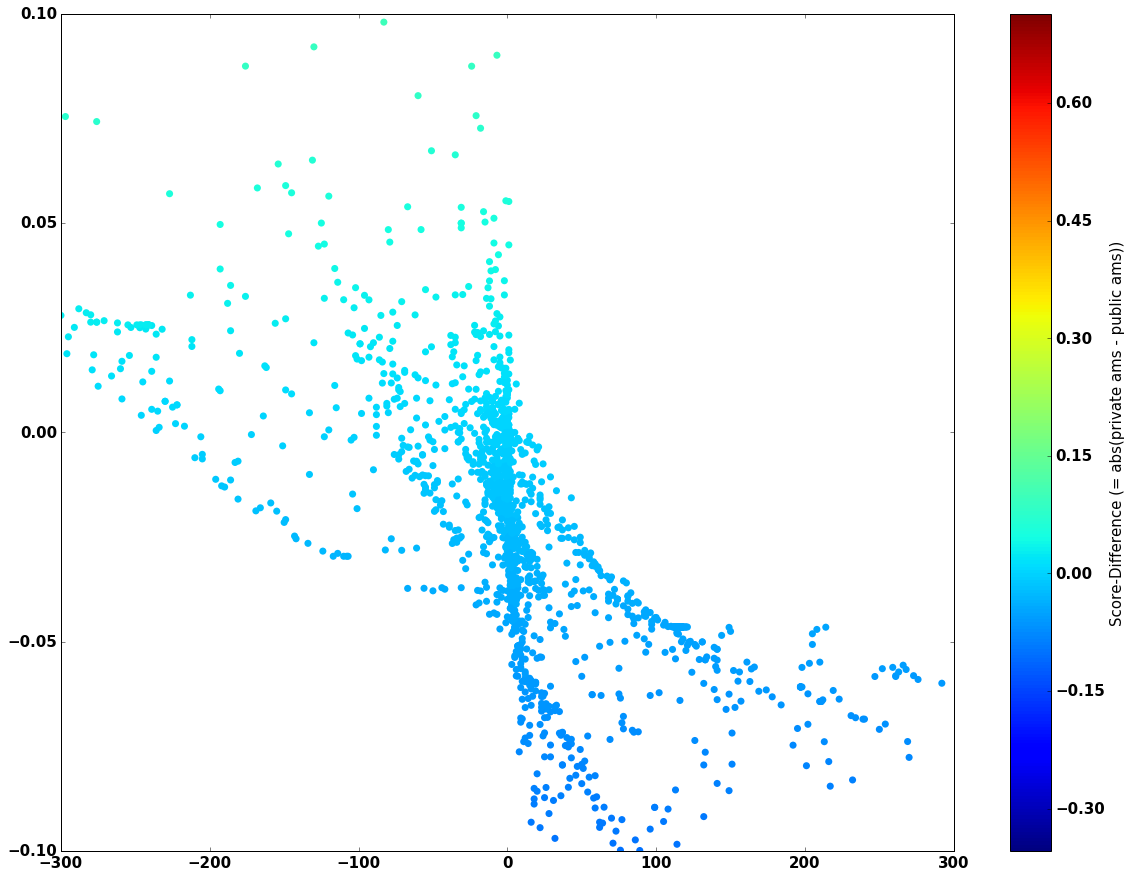

In [47]:
mainFig = plt.figure(figsize=(20,15))
ax = mainFig.add_subplot(111)

#xmax = pubLB[:,1].max()
plt.axis([-300,300,-0.1,0.1])

plt.scatter(rankdiff,scorediff,s=50,edgecolor="",c=scorediff,cmap="jet")

cbar = plt.colorbar()
cbar.set_label("Score-Difference (= abs(private ams - public ams))")

#plt.plot(privLB[:,2],privLB[:,1])